## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from hypernets.tabular.metrics import metric_to_scoring
from sklearn.metrics import get_scorer

07-25 18:29:36 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
X,y = datasets.load_breast_cancer(as_frame=True,return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=335)
train_data = pd.concat([X_train,y_train],axis=1)
eval_data = pd.concat([X_test,y_test],axis=1)

# Define your own SearchSpace with GeneralSearchSpaceGenerator

In [3]:
from hypergbm.search_space import GeneralSearchSpaceGenerator

## 1.Set n_estimators

In [4]:
my_space1=GeneralSearchSpaceGenerator(n_estimators=500)

# 2.Choose gbm model 

In [5]:
my_space2=GeneralSearchSpaceGenerator(
                                    enable_lightgbm=True,
                                    enable_xgb=False,
                                    enable_catboost=False,
                                    enable_histgb=False)

## 3.Enabel GPU train

In [6]:
my_space3=GeneralSearchSpaceGenerator(
                                    enable_lightgbm = False,
                                    xgb_init_kwargs={'tree_method': 'gpu_hist',
                                                     'gpu_id':'1'},
                                    catboost_init_kwargs={'task_type': 'GPU',
                                                          'devices':'1'}
                                    )

## 4.Advanced setting

In [7]:
from hypernets.core.search_space import Choice,Int
my_space4=GeneralSearchSpaceGenerator(
                                    enable_lightgbm=False,
                                    xgb_init_kwargs = {
                                    'booster': 'dart',
                                    'max_depth':Int(3, 15),
                                    'n_estimators': Choice([100,150,200,250,300]),
                                    'learning_rate': 0.1,
                                    'min_child_weight': 5,
                                    'gamma': 0.5,
                                    'reg_alpha': 10,
                                    'reg_lambda': 0.01}
                                    )

In [8]:
experiment1 = make_experiment(train_data.copy(),target='target',
                            search_space=my_space1)
experiment2 = make_experiment(train_data.copy(),target='target',
                            search_space=my_space2)
experiment3 = make_experiment(train_data.copy(),target='target',
                            search_space=my_space3)
experiment4 = make_experiment(train_data.copy(),target='target',
                            search_space=my_space3)

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


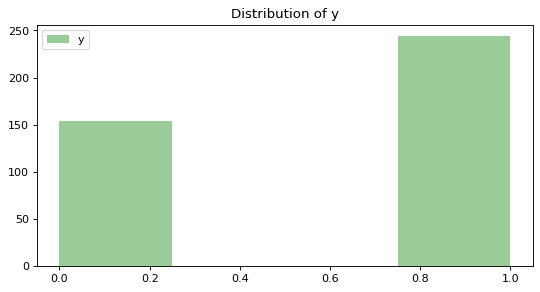

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,9527
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.947236,7,0.977387,34.164411,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,7,0.977387,1.615053,"[2, 1, 1, 3, 0, 2, 2]"
1,1,0.967337,21.174128,"[2, 1, 0, 0, 3, 0]"
2,3,0.964824,0.590612,"[0, 3, 1, 0, 445, 1, 3, 2, 2, 1]"
3,5,0.959799,1.682511,"[0, 2, 0, 0, 300, 1, 1, 0, 3]"
4,2,0.954774,2.290402,"[2, 1, 1, 0, 1, 3, 0]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 1, 1, 3, 0, 2, 2]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.1
4-Module_CatBoostEstimator_1.depth,3
5-Module_CatBoostEstimator_1.l2_leaf_reg,10
6-numeric_or_scaler_0.hp_or,2


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.959799
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.35, 0.5, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0..."
1,scores,"[0.9597989949748744, 0.964824120603015, 0.9673..."
2,best_stack,"[0, 1, 1, 2, 5, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, ..."
3,hits,"{0: 7, 1: 10, 2: 2, 5: 1}"
4,ensemble_size,20


Pipeline(steps=[('data_clean',
                 DataCleanStep(cv=True,
                               data_cleaner_args={'correct_object_dtype': True,
                                                  'drop_columns': None,
                                                  'drop_constant_columns': True,
                                                  'drop_duplicated_columns': False,
                                                  'drop_idness_columns': True,
                                                  'drop_label_nan_rows': True,
                                                  'int_convert_to': 'float',
                                                  'nan_chars': None,
                                                  'reduce_mem_usage': False},
                               name='data_clean', random_state=9527)),
                ('estimator',
                 GreedyEnsemble(weight=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], scores=[0.9773869346733668, 0.9773869346733668, 0.9773869

In [9]:
experiment1.run()

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


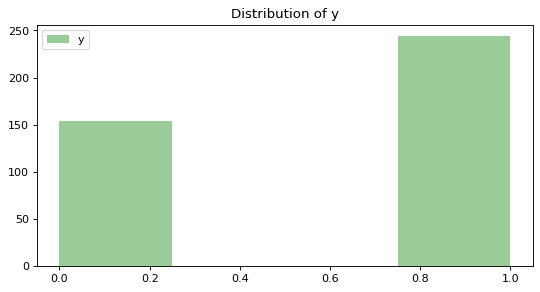

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,9527
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.954774,5,0.954774,7.498142,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,5,0.954774,1.183731,"[1, 1, 0, 210, 2, 1, 5, 2, 4, 3]"
1,10,0.954774,0.286723,"[0, 1, 0, 335, 0, 2, 0, 1, 2, 1]"
2,2,0.952261,0.862749,"[0, 1, 1, 500, 0, 3, 3, 2, 4, 3]"
3,1,0.944724,0.497245,"[3, 1, 1, 325, 2, 2, 0, 4, 1, 3]"
4,4,0.942211,0.312530,"[2, 0, 1, 290, 2, 3, 1, 3, 3]"


#### Best Trial:

key,value
signature,37153eee98cebbfa9dbf6523c1fc06ea
vectors,"[1, 1, 0, 210, 2, 1, 5, 2, 4, 3]"
0-numeric_imputer_0.strategy,median
1-numeric_scaler_optional_0.hp_opt,True
2-Module_LightGBMEstimator_1.boosting_type,gbdt
3-Module_LightGBMEstimator_1.num_leaves,210
4-Module_LightGBMEstimator_1.max_depth,7
5-Module_LightGBMEstimator_1.learning_rate,0.01
6-Module_LightGBMEstimator_1.n_estimators,300
7-Module_LightGBMEstimator_1.reg_alpha,0.1


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.959799
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.35, 0.5, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0..."
1,scores,"[0.9597989949748744, 0.964824120603015, 0.9673..."
2,best_stack,"[0, 1, 1, 2, 5, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, ..."
3,hits,"{0: 7, 1: 10, 2: 2, 5: 1}"
4,ensemble_size,20


Pipeline(steps=[('data_clean',
                 DataCleanStep(cv=True,
                               data_cleaner_args={'correct_object_dtype': True,
                                                  'drop_columns': None,
                                                  'drop_constant_columns': True,
                                                  'drop_duplicated_columns': False,
                                                  'drop_idness_columns': True,
                                                  'drop_label_nan_rows': True,
                                                  'int_convert_to': 'float',
                                                  'nan_chars': None,
                                                  'reduce_mem_usage': False},
                               name='data_clean', random_state=9527)),
                ('estimator',
                 GreedyEnsemble(weight=[0.95 0.   0.05 0.   0.   0.   0.   0.   0.   0.  ], scores=[0.9547738693467337, 0.9572864

In [10]:
experiment2.run()

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


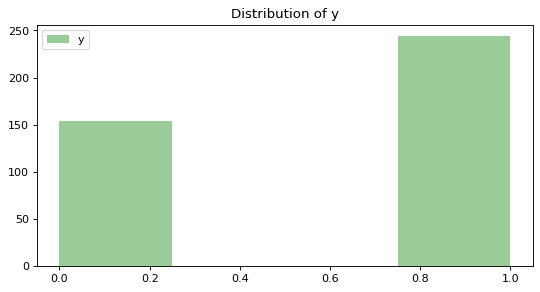

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,9527
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.959799,3,0.969849,41.045321,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,3,0.969849,5.222913,"[1, 0, 0, 5, 3, 2, 2]"
1,2,0.967337,6.039248,"[1, 3, 1, 3, 3, 3, 0, 4]"
2,8,0.959799,4.888854,"[1, 2, 0, 5, 0, 2, 2]"
3,10,0.959799,10.135585,"[1, 1, 0, 4, 1, 3, 0]"
4,6,0.954774,2.057835,"[1, 3, 1, 1, 1, 3, 2, 3]"


#### Best Trial:

key,value
signature,29991d00d396f581c473265dff595f78
vectors,"[1, 0, 0, 5, 3, 2, 2]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.n_estimators,300
4-Module_CatBoostEstimator_1.learning_rate,0.1
5-Module_CatBoostEstimator_1.depth,7
6-Module_CatBoostEstimator_1.l2_leaf_reg,10


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.959799
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.35, 0.5, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0..."
1,scores,"[0.9597989949748744, 0.964824120603015, 0.9673..."
2,best_stack,"[0, 1, 1, 2, 5, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, ..."
3,hits,"{0: 7, 1: 10, 2: 2, 5: 1}"
4,ensemble_size,20


Pipeline(steps=[('data_clean',
                 DataCleanStep(cv=True,
                               data_cleaner_args={'correct_object_dtype': True,
                                                  'drop_columns': None,
                                                  'drop_constant_columns': True,
                                                  'drop_duplicated_columns': False,
                                                  'drop_idness_columns': True,
                                                  'drop_label_nan_rows': True,
                                                  'int_convert_to': 'float',
                                                  'nan_chars': None,
                                                  'reduce_mem_usage': False},
                               name='data_clean', random_state=9527)),
                ('estimator',
                 GreedyEnsemble(weight=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], scores=[0.9698492462311558, 0.9698492462311558, 0.9698492

In [11]:
experiment3.run()

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


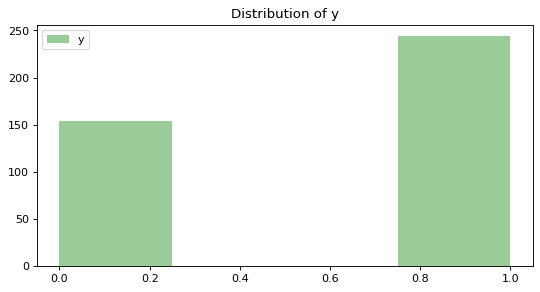

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,9527
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.957286,1,0.959799,31.70096,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,1,0.959799,3.245499,"[1, 2, 1, 5, 2, 0, 4, 2]"
1,2,0.959799,0.895012,"[0, 1, 1, 3, 2, 5, 0, 0, 2, 3, 1, 3]"
2,6,0.959799,0.666279,"[0, 0, 0, 3, 2, 2, 0, 3, 2, 3, 3]"
3,5,0.957286,5.231665,"[1, 2, 0, 5, 1, 2, 1]"
4,10,0.957286,3.634209,"[1, 2, 0, 5, 0, 1, 3]"


#### Best Trial:

key,value
signature,e6c938491a6fd59eb4d4beeac26022ab
vectors,"[1, 2, 1, 5, 2, 0, 4, 2]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.n_estimators,300
4-Module_CatBoostEstimator_1.learning_rate,0.5
5-Module_CatBoostEstimator_1.depth,3
6-Module_CatBoostEstimator_1.l2_leaf_reg,30
7-numeric_or_scaler_0.hp_or,2


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.959799
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.35, 0.5, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0..."
1,scores,"[0.9597989949748744, 0.964824120603015, 0.9673..."
2,best_stack,"[0, 1, 1, 2, 5, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, ..."
3,hits,"{0: 7, 1: 10, 2: 2, 5: 1}"
4,ensemble_size,20


Pipeline(steps=[('data_clean',
                 DataCleanStep(cv=True,
                               data_cleaner_args={'correct_object_dtype': True,
                                                  'drop_columns': None,
                                                  'drop_constant_columns': True,
                                                  'drop_duplicated_columns': False,
                                                  'drop_idness_columns': True,
                                                  'drop_label_nan_rows': True,
                                                  'int_convert_to': 'float',
                                                  'nan_chars': None,
                                                  'reduce_mem_usage': False},
                               name='data_clean', random_state=9527)),
                ('estimator',
                 GreedyEnsemble(weight=[0.35 0.5  0.1  0.   0.   0.05 0.   0.   0.   0.  ], scores=[0.9597989949748744, 0.9648241

In [12]:
experiment4.run()